Importing the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


importing the dataset


In [ ]:
dataset = pd.read_csv("/content/train.csv")

We create 2 entities 1. metrix of features 2. dependent variable vector. for every dataset and ml model we have the same variables. features are the column where we are going to predict the output. features are target variables. features colums first and then dependent variable are at the end. iloc stands for locate index

In [ ]:
x = dataset[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt','FullBath','TotRmsAbvGrd']]
y = dataset[['SalePrice']]


In [ ]:
print(x)

      OverallQual  GrLivArea  TotalBsmtSF  GarageCars  YearBuilt  FullBath  \
0               7       1710          856           2       2003         2   
1               6       1262         1262           2       1976         2   
2               7       1786          920           2       2001         2   
3               7       1717          756           3       1915         1   
4               8       2198         1145           3       2000         2   
...           ...        ...          ...         ...        ...       ...   
1455            6       1647          953           2       1999         2   
1456            6       2073         1542           2       1978         2   
1457            7       2340         1152           1       1941         2   
1458            5       1078         1078           1       1950         1   
1459            5       1256         1256           1       1965         1   

      TotRmsAbvGrd  
0                8  
1                6  


In [ ]:
print(y)


      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]


In [ ]:
x.isnull().sum()

,0
OverallQual,0
GrLivArea,0
TotalBsmtSF,0
GarageCars,0
YearBuilt,0
FullBath,0
TotRmsAbvGrd,0


In [ ]:
y.isnull().sum()


,0
SalePrice,0


blank data is there ways to handle 1. ignore them by deleting - work on large data 2. Replacing with average salaries no null values so we are skipping this


from sklearn.impute import SimpleImputer
imputer = simpleimputer(missing_values= np.nan , startegy= 'mean' )
till here we havent cooncted this to our tables so we are going to connect this
imputer.fit(x[: , 1:3])
x[: , 1:3] =imputer.transform(x[: , 1:3])
print(x)

> Add blockquote



If categorical data is present in the data then model will have difficulty in the making decision so we afre going to change categorical data to the another datatype
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder() , [0] )], reminder= 'passthrough')
x=np.array(ct.fit_transform(x) )
print(x)

from sklearn.preprocessing import LabelEncoder
le = LableEncoder()
y= le.fit_transform(y)
print(y)

SPLITTING THE DATASET WITH THE HEP OF SKLEARN ITS FUNCTION TRAIN_TEST_SPLIT WILL SPLIT DATA INTO TRAINING AND  TESTING, ACTUALLY WE ARE GOING TO HAVE 4 SETS X,Y, TRAIN , TEST  

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)
# x is the function matrix and y is the deoendent variable  , test size means 80% train 20% test , for having same result shown here we have used random state

In [ ]:
print(x_train)

      OverallQual  GrLivArea  TotalBsmtSF  GarageCars  YearBuilt  FullBath  \
921             5       2200         1272           0       1900         2   
520             4       1294            0           0       1900         2   
401             7       1310         1310           2       2005         2   
280             7       1982          807           2       1989         2   
1401            6       1593          839           2       2004         2   
...           ...        ...          ...         ...        ...       ...   
715             6       1350         1064           2       1974         2   
905             5       1063         1056           1       1954         1   
1096            6       1355          684           0       1914         1   
235             6        987          483           1       1971         1   
1061            3        894          894           3       1935         1   

      TotRmsAbvGrd  
921              9  
520              7  


In [ ]:
print(x_test)

      OverallQual  GrLivArea  TotalBsmtSF  GarageCars  YearBuilt  FullBath  \
258             7       1792          963           2       2001         2   
267             5       2192          720           1       1939         2   
288             5        900          882           1       1967         1   
649             4        630          630           0       1970         1   
1233            5       1188         1188           2       1959         1   
...           ...        ...          ...         ...        ...       ...   
163             4        882          882           0       1956         1   
47              8       1656         1656           3       2006         2   
1432            4        968          656           1       1927         2   
98              5        835          458           1       1920         1   
409             8       2078         1034           3       2007         2   

      TotRmsAbvGrd  
258              7  
267              8  


In [ ]:
print(y_train)

      SalePrice
921      145900
520      106250
401      164990
280      228500
1401     193000
...         ...
715      165000
905      128000
1096     127000
235       89500
1061      81000

[1168 rows x 1 columns]


In [ ]:
print(y_test)

      SalePrice
258      231500
267      179500
288      122000
649       84500
1233     142000
...         ...
163      103200
47       249700
1432      64500
98        83000
409      339750

[292 rows x 1 columns]


FEATURE SCALING ALLOW US TO SCALE FEATURES INTO A SINGLE 2 TECHNIQUES 1. sTANDARDIZATION 2. NORMALIZATION , NORMALIZATION WE ARE GOING TO USE

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_test)

[[ 0.63214681  0.51665953 -0.23891371 ...  0.96579268  0.78430432
   0.27752718]
 [-0.82848123  1.28102429 -0.78138493 ... -1.0818371   0.78430432
   0.89261588]
 [-0.82848123 -1.18787388 -0.41973745 ... -0.15710107 -1.04783057
  -0.95265022]
 ...
 [-1.55879524 -1.05793187 -0.92425801 ... -1.47815254  0.78430432
  -0.95265022]
 [-0.82848123 -1.31208315 -1.36627159 ... -1.70933655 -1.04783057
  -0.95265022]
 [ 1.36246082  1.06318033 -0.08041389 ...  1.1639504   0.78430432
   0.89261588]]


In [ ]:
print(y_train)

      SalePrice
921      145900
520      106250
401      164990
280      228500
1401     193000
...         ...
715      165000
905      128000
1096     127000
235       89500
1061      81000

[1168 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
print(y_pred[:5])


[[221220.29861444]
 [155276.00755091]
 [111549.01731971]
 [ 53024.64118803]
 [148254.17150752]]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8140415072917817
RMSE: 36417.65286751647


In [ ]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)

        Feature   Coefficient
0   OverallQual  28444.728408
1     GrLivArea  22487.416482
2   TotalBsmtSF  12703.046227
3    GarageCars  12104.682834
4     YearBuilt   9743.692601
5      FullBath  -1862.423598
6  TotRmsAbvGrd   2831.260234


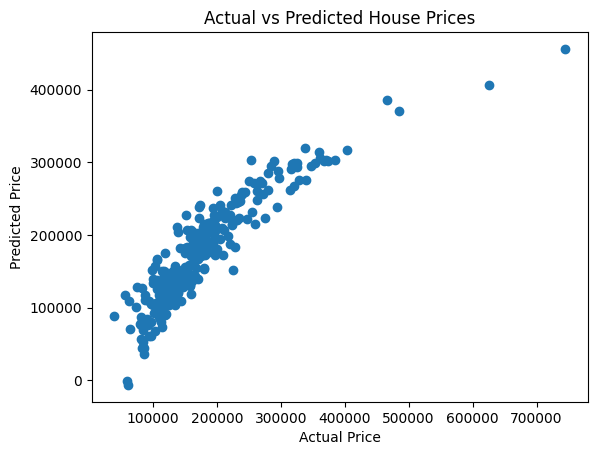

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
